# **Single Qubit Gates**

In the previous section we looked at all the possible states a qubit could be in. We saw that qubits could be represented by 2D vectors, and that their states are limited to the form:

$$ |q\rangle = \cos{(\tfrac{\theta}{2})}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Where $\theta$ and $\phi$ are real numbers. In this section we will cover _gates,_ the operations that change a qubit between these states. Due to the number of gates and the similarities between them, this chapter is at risk of becoming a list. To counter this, we have included a few digressions to introduce important ideas at appropriate places throughout the chapter. 

In _The Atoms of Computation_ we came across some gates and used them to perform a classical computation. An important feature of quantum circuits is that, between initialising the qubits and measuring them, the operations are *_always_* reversible! As a result, all the gates we can use in a quantum circuit are reversible too. These reversible gates can be represented as matrices, or thought of as rotations around the Bloch sphere. 

In [1]:
import qiskit as qpk
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## Pauli Gates

### _X-Gate_

The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

In Qiskit, we can create a short circuit to verify this:

In [2]:
qc = qpk.QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: |0>┤ X ├
        └───┘

Let's see the result of the above circiut. **Note:** Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.

[0.+0.j 1.+0.j]


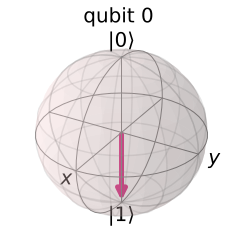

In [3]:
# Let's see the result
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the *x-axis* of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

### _Y & Z-gates_
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = i|0\rangle\langle1| - i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the y and z-axis of the Bloch sphere.

You may also notice that the Z-gate appears to have no effect on our qubit when it is in either of these two states. This is because the states $|0\rangle$ and $|1\rangle$ are the two _eigenstates_ of the Z-gate. In fact, the _computational basis_ (the basis formed by the states $|0\rangle$ and $|1\rangle$) is often called the Z-basis. This is not the only basis we can use, a popular basis is the X-basis, formed by the eigenstates of the X-gate. We call these two vectors $|+\rangle$ and $|-\rangle$:

$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$


**Exercise 1.** Verify that $|+\rangle$ and $|-\rangle$ are in fact eigenstates of the X-gate.

$$ X|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = |+\rangle$$

$$ X|-\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ -1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix} -1 \\ 1 \end{bmatrix} = -|-\rangle$$

**Exercise 2.** What eigenvalues do they have?

1 and -1 are respectively the eigenvalues

**Exercise 3.** Why would we not see these eigenvales on the Bloch sphere.

The Boch sphere is a cartesian representation of the z-basis

**Exercise 4.** Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere

In [4]:
import sympy as sp
from sympy.physics.quantum.dagger import Dagger

In [5]:
Y = sp.Matrix([[0, complex(0, -1)], [complex(0, 1), 0]])
state1 = Y.eigenvects()[0][2][0]
state2 = Y.eigenvects()[1][2][0]
state1.dot(Dagger(state2))

0

In [6]:
state1

Matrix([
[1.0*I],
[  1.0]])

$$  \tfrac{1}{\sqrt{2}}\begin{bmatrix} i \\ 1 \end{bmatrix} = |\circlearrowleft\rangle = \tfrac{i}{\sqrt{2}}(|0\rangle - i|1\rangle)$$

$$  \tfrac{1}{\sqrt{2}}\begin{bmatrix} -i \\ 1 \end{bmatrix} = |\circlearrowright\rangle = \tfrac{-i}{\sqrt{2}}(|0\rangle + i|1\rangle)$$

On the cartesian basis: [0, 1, 0] and [0, -1, 0] respectively.

### _The Hadamard Gate_

The Hadamard gate (H-gate) has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

**Exercise 5.** Write the H-gate as the outer products of vectors $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|-\rangle$.

$$ |+\rangle\langle 0| + |-\rangle\langle 1|= \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = H $$

**Exercise 6.** Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.

Lets see step by step every gate effect

In [7]:
qc = qpk.QuantumCircuit(1)
qc.h(0)
qc.draw()

┌───┐
q_0: |0>┤ H ├
        └───┘

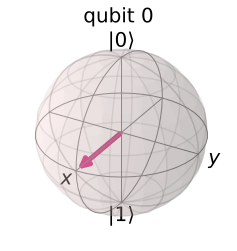

In [8]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [9]:
qc = qpk.QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.draw()

┌───┐┌───┐
q_0: |0>┤ H ├┤ Z ├
        └───┘└───┘

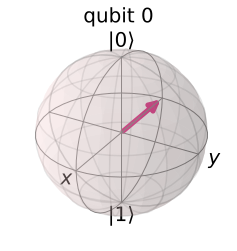

In [10]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

In [11]:
qc = qpk.QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw()

┌───┐┌───┐┌───┐
q_0: |0>┤ H ├┤ Z ├┤ H ├
        └───┘└───┘└───┘

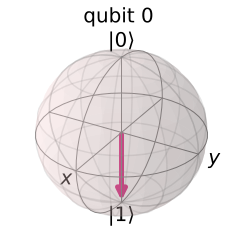

In [12]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

What happen when we apply two h-gates together

In [13]:
qc = qpk.QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw()

┌───┐┌───┐
q_0: |0>┤ H ├┤ H ├
        └───┘└───┘

[1.-6.123234e-17j 0.+6.123234e-17j]


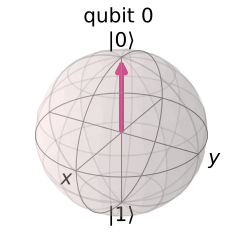

In [14]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

Lets see now the effect of Pauli X-Gate

In [15]:
qc = qpk.QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: |0>┤ X ├
        └───┘

[0.+0.j 1.+0.j]


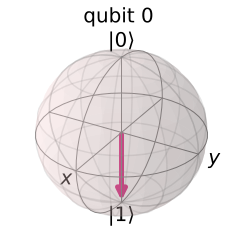

In [16]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

Lets to see the effect with other first state

In [17]:
from qiskit.extensions import Initialize

qc = qpk.QuantumCircuit(1) 
inital_state = [sqrt(2)/sqrt(3),1/sqrt(3)] 
init_op = Initialize(inital_state)
qc.append(init_op,[0])
qc.draw()

┌────────────────────────────┐
q_0: |0>┤ Initialize(0.8165,0.57735) ├
        └────────────────────────────┘

[0.81649658+0.j 0.57735027+0.j]


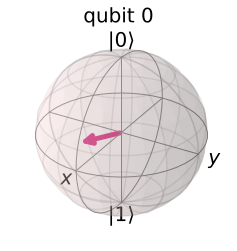

In [18]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

In [19]:
qc = qpk.QuantumCircuit(1) 
inital_state = [sqrt(2)/sqrt(3),1/sqrt(3)] 
init_op = Initialize(inital_state)
qc.append(init_op,[0])
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw()

┌────────────────────────────┐┌───┐┌───┐┌───┐
q_0: |0>┤ Initialize(0.8165,0.57735) ├┤ H ├┤ Z ├┤ H ├
        └────────────────────────────┘└───┘└───┘└───┘

[0.57735027-5.60615277e-17j 0.81649658-1.46434883e-17j]


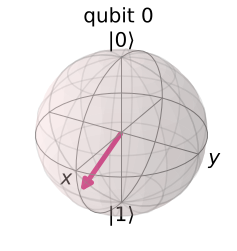

In [20]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

In [21]:
qc = qpk.QuantumCircuit(1) 
inital_state = [sqrt(2)/sqrt(3),1/sqrt(3)] 
init_op = Initialize(inital_state)
qc.append(init_op,[0])
qc.x(0)
qc.draw()

┌────────────────────────────┐┌───┐
q_0: |0>┤ Initialize(0.8165,0.57735) ├┤ X ├
        └────────────────────────────┘└───┘

[0.57735027+0.j 0.81649658+0.j]


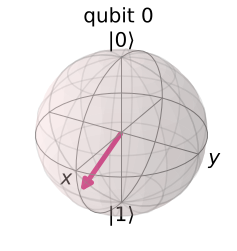

In [22]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

**Exercise 7.** Find a combination of X, Z and H gates that is equivalent to a Y gate (ignoring global phase)

Lets see how act and Y gate

In [23]:
qc = qpk.QuantumCircuit(1) 
inital_state = [sqrt(2)/sqrt(3),1/sqrt(3)] 
init_op = Initialize(inital_state)
qc.append(init_op,[0])
qc.draw()

┌────────────────────────────┐
q_0: |0>┤ Initialize(0.8165,0.57735) ├
        └────────────────────────────┘

[0.81649658+0.j 0.57735027+0.j]


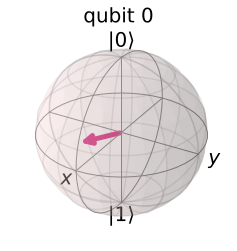

In [24]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

The Y-Gate rotates an state pi angle

In [25]:
qc = qpk.QuantumCircuit(1) 
inital_state = [sqrt(2)/sqrt(3),1/sqrt(3)] 
init_op = Initialize(inital_state)
qc.append(init_op,[0])
qc.y(0)
qc.draw()

┌────────────────────────────┐┌───┐
q_0: |0>┤ Initialize(0.8165,0.57735) ├┤ Y ├
        └────────────────────────────┘└───┘

[0.-0.57735027j 0.+0.81649658j]


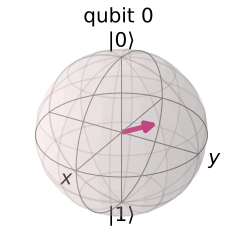

In [26]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

In [27]:
qc = qpk.QuantumCircuit(1) 
inital_state = [sqrt(2)/sqrt(3),1/sqrt(3)] 
init_op = Initialize(inital_state)
qc.append(init_op,[0])
qc.h(0)
qc.z(0)
qc.x(0)
qc.h(0)
qc.draw()

┌────────────────────────────┐┌───┐┌───┐┌───┐┌───┐
q_0: |0>┤ Initialize(0.8165,0.57735) ├┤ H ├┤ Z ├┤ X ├┤ H ├
        └────────────────────────────┘└───┘└───┘└───┘└───┘

[ 0.57735027-1.56053520e-16j -0.81649658+8.53485042e-17j]


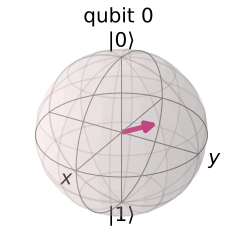

In [28]:
backend = qpk.Aer.get_backend('statevector_simulator')
out = qpk.execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

The gates HZXH is the same that apply n Y gate

## Measuring In Different Bases

We have seen that the Z-axis is not intrinsically special, and that there are infinitely many other bases. Similarly with measurement, we don’t always have to measure in the computational basis (the Z-basis), we can measure our qubits in any basis.

As an example, let’s try measuring in the X-basis. We can calculate the probability of measuring either $|+\rangle$ or $|-\rangle$:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

And after measurement, we are guaranteed to have a qubit in one of these two states. Since Qiskit only allows measuring in the Z-basis, we must create our own using Hadamard gates:

In [29]:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

qc = qpk.QuantumCircuit(1,1)
initial_state = [0,1]
initialize_qubit = Initialize(initial_state)
qc.append(initialize_qubit, [0])
x_measurement(qc, 0, 0)
qc.draw()

┌─────────────────┐┌───┐┌─┐┌───┐
q_0: |0>┤ Initialize(0,1) ├┤ H ├┤M├┤ H ├
        └─────────────────┘└───┘└╥┘└───┘
 c_0: 0 ═════════════════════════╩══════

Before, we saw you could create an X-gate by sandwiching our Z-gate between two H-gates:

$$ X = HZH $$

Here have created an X-measurement by sandwiching our Z-measurement between two H-gates. Let’s now see the results:

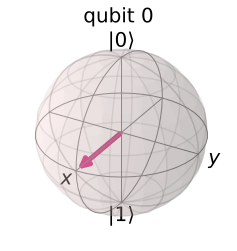

In [30]:
backend = qpk.Aer.get_backend('statevector_simulator')
out_state = qpk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out_state)

We initialised our qubit in the state $|1\rangle$, but we can see that, after the measurement, we have collapsed our qubit to the states $|+\rangle$ or $|-\rangle$. If you run the cell again, you will see different results, but the final state of the qubit will always be $|+\rangle$ or $|-\rangle$.

**Exercise 8.** If we initialise our qubit in the state $|+\rangle$, what is the probability of measuring it in state $|-\rangle$?

It depends on if we apply some gates o not. In case we don't apply any gate the probability is 0

**Exercise 9.** Use Qiskit to display the probability of measuring a $|0\rangle$ qubit in the states $|+\rangle$ and $|-\rangle$ (**Hint:** you might want to use `.get_counts()` and `plot_histogram()`).

In [31]:
from qiskit.visualization import plot_histogram

In [32]:
qc = qpk.QuantumCircuit(1)
inital_state = [1/sqrt(2),1/sqrt(2)]
init_op = Initialize(inital_state)
qc.append(init_op,[0])
qc.draw()  

┌─────────────────────────────┐
q_0: |0>┤ Initialize(0.70711,0.70711) ├
        └─────────────────────────────┘

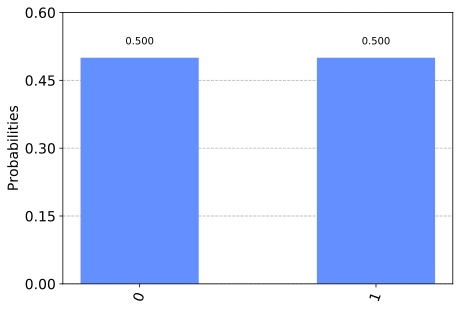

In [33]:
backend = qpk.Aer.get_backend('statevector_simulator')
out_state = qpk.execute(qc,backend).result().get_counts()
plot_histogram(out_state)

In [34]:
qc = qpk.QuantumCircuit(1)
inital_state = [1/sqrt(2),-1/sqrt(2)]
init_op = Initialize(inital_state)
qc.append(init_op,[0])
qc.draw()  

┌──────────────────────────────┐
q_0: |0>┤ Initialize(0.70711,-0.70711) ├
        └──────────────────────────────┘

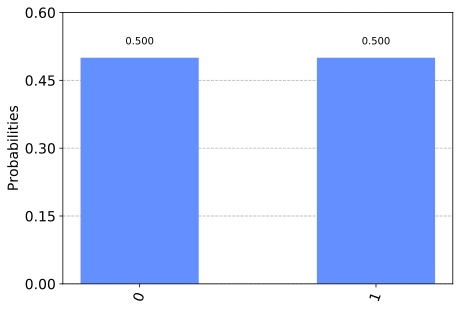

In [35]:
backend = qpk.Aer.get_backend('statevector_simulator')
out_state = qpk.execute(qc,backend).result().get_counts()
plot_histogram(out_state)

Measuring in different bases allows us to see Heisenberg’s famous uncertainty principle in action. Having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the  X-basis, and vice versa. A common misconception is that the uncertainty is due to the limits in our equipment, but here we can see the uncertainty is actually part of the nature of the qubit. 

For example, if we put our qubit in the state $|0\rangle$, our measurement in the Z-basis is certain to be $|0\rangle$, but our measurement in the X-basis is completely random! Similarly, if we put our qubit in the state $|-\rangle$, our measurement in the X-basis is certain to be $|-\rangle$, but now any measurement in the Z-basis will be completely random.

More generally: _Whatever state our quantum system is in, there is always a measurement that has a certain outcome._ 

The introduction of the H-gate has allowed us to explore some interesting phenomena, but we are still very limited in our quantum operations. Let us now introduce a new type of gate:

## The R<sub>ϕ</sub>-gate

The R<sub>ϕ</sub>-gate is _parametrised,_ that is, it needs a number ($\phi$) to tell it exactly what to do. The R<sub>ϕ</sub>-gate performs a rotation of $\phi$ around the Z-axis (and as such is sometimes also known as the R<sub>z</sub>-gate). It has the matrix:

$$
R_\phi = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

Where $\phi$ is a real number.

In [36]:
qc = qpk.QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw()

┌──────────┐
q_0: |0>┤ Rz(pi/4) ├
        └──────────┘

You may notice that the Z-gate is a special case of the R<sub>ϕ</sub>-gate, with $\phi = \pi$. In fact there are three more commonly referenced gates we will mention in this chapter, all of which are special cases of the R<sub>ϕ</sub>-gate:

## The I, S and T-gates

### _The I-gate_

First comes the I-gate (aka ‘Id-gate’ or ‘Identity gate’). This is simply a gate that does nothing. Its matrix is the identity matrix:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

Applying the identity gate anywhere in your circuit should have no effect on the qubit state, so it’s interesting this is even considered a gate. There are two main reasons behind this, one is that it is often used in calculations, for example: proving the X-gate is its own inverse:

$$ I = XX $$

The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.

### _The S-gates_

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate), this is an R<sub>ϕ</sub>-gate with $\phi = \pi/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).  The the S<sup>†</sup>-gate is clearly an R<sub>ϕ</sub>-gate with $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

This notation is common throughout quantum computing.

To add an S-gate in Qiskit:

In [37]:
qc = qpk.QuantumCircuit(1)
qc.s(0)
qc.sdg(0)
qc.draw()

┌───┐┌─────┐
q_0: |0>┤ S ├┤ Sdg ├
        └───┘└─────┘

### _The T-gate_


The T-gate is a very commonly used gate, it is an R<sub>ϕ</sub>-gate with $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

As with the S-gate, the T-gate is sometimes also known as the $\sqrt[4]{Z}$-gate.

In Qiskit:

In [38]:
qc = qpk.QuantumCircuit(1)
qc.t(0)
qc.tdg(0)
qc.draw()

┌───┐┌─────┐
q_0: |0>┤ T ├┤ Tdg ├
        └───┘└─────┘

## The General U<sub>3</sub>-gate

As we saw earlier, the I, Z, S & T-gates were all special cases of the more general R<sub>ϕ</sub>-gate. In the same way, the U<sub>3</sub>-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

$$
U_3 = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
            e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2)
     \end{bmatrix}
$$

Every gate in this chapter could be specified as $U_3(\theta,\phi,\lambda)$, but it is unusual to see this, possibly due to the difficulty in reading this.

It should be obvious from this that there are an infinite number of possible gates, and that this also includes R<sub>x</sub> and R<sub>y</sub>-gates, although they are not mentioned here. It must also be noted that there is nothing special about the Z-basis, except that it has been selected as the standard computational basis. That is why we have names for the S and T-gates, but not their X and Y equivalents (e.g. $\sqrt{X}$ and $\sqrt[4]{Y}$).

Qiskit also provides U<sub>2</sub> and U<sub>1</sub>-gates, which are specific cases of the U<sub>3</sub> gate in which $\theta = 0$, and $\theta = \phi = 0$ respectively. You will notice that the U<sub>1</sub>-gate is equivalent to the R<sub>ϕ</sub>-gate.